#                                         2016-2019 Public Schools Comparison by California's Smarter Balanced Assessment Results

## California Placer County High Schools

In [143]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

In [82]:
publicschools = pd.read_csv("public_schools20162019.csv", na_values="*", low_memory=False)
results16 = pd.read_csv("data2016.csv", na_values="*")
results17 = pd.read_csv("data2017.csv", na_values="*")
results18 = pd.read_csv("data2018.csv", na_values="*")
results19 = pd.read_csv("data2019.csv", na_values="*")

In [13]:
publicschools.dtypes

CDSCode         int64
County         object
District       object
School         object
EILCode        object
EILName        object
OpenDate       object
Charter        object
Magnet         object
YearRoundYN    object
FundingType    object
dtype: object

### Magnet School Effect in All Elementary and High School Grades in 2018

In [11]:
results18.dtypes

CDSCode                             int64
Test Id                             int64
Grade                               int64
Students Tested                   float64
Mean Scale Score                  float64
Subgroup ID                         int64
Percentage Standard Exceeded      float64
Percentage Standard Met           float64
Percentage Standard Nearly Met    float64
Percentage Standard Not Met       float64
dtype: object

In [12]:
df2018 = publicschools.merge(results18, on="CDSCode", how="inner")
df2018 = df2018.dropna()

In [14]:
df2018.columns

Index(['CDSCode', 'County', 'District', 'School', 'EILCode', 'EILName',
       'OpenDate', 'Charter', 'Magnet', 'YearRoundYN', 'FundingType',
       'Test Id', 'Grade', 'Students Tested', 'Mean Scale Score',
       'Subgroup ID', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met'],
      dtype='object')

In [15]:
df2018["EILName"].unique()

array(['Elementary', 'Elementary-High Combination',
       'Intermediate/Middle/Junior High', 'High School'], dtype=object)

In [16]:
df2018.loc[df2018["EILName"] == 'Elementary']["Grade"].unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [17]:
df2018.loc[df2018["EILName"] == 'High School']["Grade"].unique()

array([11,  7,  8], dtype=int64)

In [18]:
# Magnet elementary school effect on English Language Arts/Literacy Test Results
dfl = df2018.loc[(df2018["Test Id"] == 1)]
dflelementary = dfl[(dfl["Grade"] == 3) | (dfl["Grade"] == 4) | (dfl["Grade"] == 5) | (dfl["Grade"] == 6) | (dfl["Grade"] == 7) | (dfl["Grade"] == 8)]
MagnetGroups_df = dflelementary.groupby('Magnet', as_index=False)[[ 'Mean Scale Score', 'Percentage Standard Met','Percentage Standard Exceeded',
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
MagnetGroups_df

,Magnet,Mean Scale Score,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Nearly Met,Percentage Standard Not Met
0,N,2507.317974,30.500029,22.425125,23.085225,23.989295
1,Y,2558.153435,33.743145,33.349282,17.167496,15.739985


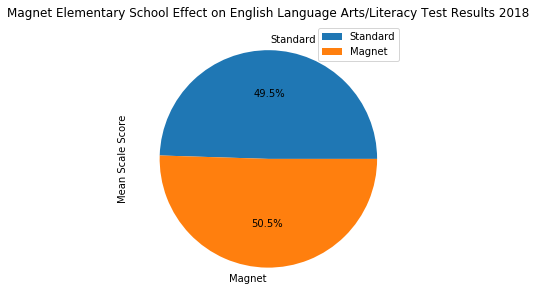

In [19]:
elem_magnet_lit = dflelementary.groupby('Magnet', as_index=False)["Mean Scale Score"].mean()
labels = ["Magnet", "Standard"]
elem_magnet_lit.plot(kind="pie", y="Mean Scale Score", labels=["Standard", "Magnet"], title="Magnet Elementary School Effect on English Language Arts/Literacy Test Results 2018", figsize=(5, 5), autopct='%1.1f%%')



In [20]:
# Magnet elementary school effect on Math Test Results

dfm = df2018.loc[(df2018["Test Id"] == 2)]
dfmelementary = dfm[(dfm["Grade"] == 3) | (dfm["Grade"] == 4) | (dfm["Grade"] == 5) | (dfm["Grade"] == 6) | (dfm["Grade"] == 7) | (dfm["Grade"] == 8)]


MagnetGroups_df = dfmelementary.groupby('Magnet', as_index=False)[[ 'Mean Scale Score', 'Percentage Standard Met','Percentage Standard Exceeded',
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
MagnetGroups_df

,Magnet,Mean Scale Score,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Nearly Met,Percentage Standard Not Met
0,N,2498.485643,22.624759,19.747975,28.170556,29.456391
1,Y,2551.909327,23.208456,34.971957,20.973043,20.846315


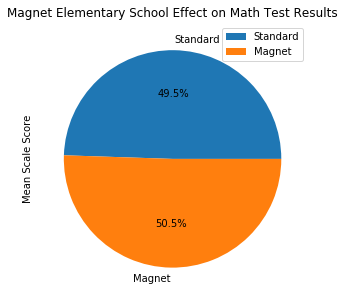

In [21]:
elem_magnet_math = dfmelementary.groupby('Magnet', as_index=False)["Mean Scale Score"].mean()
labels = ["Magnet", "Standard"]
elem_magnet_math.plot(kind="pie", y="Mean Scale Score", labels=["Standard", "Magnet"], title="Magnet Elementary School Effect on Math Test Results", figsize=(5, 5), autopct='%1.1f%%')



In [22]:
# Magnet High school effect on English Language Arts/Literacy Test Results

dfl = df2018.loc[(df2018["Test Id"] == 1)]
dflhigh = dfl[(dfl["Grade"] == 7) | (dfl["Grade"] == 8) | (dfl["Grade"] == 11)]


MagnetGroups_df = dflhigh.groupby('Magnet', as_index=False)[[ 'Mean Scale Score', 'Percentage Standard Met','Percentage Standard Exceeded',
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
MagnetGroups_df

,Magnet,Mean Scale Score,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Nearly Met,Percentage Standard Not Met
0,N,2567.390511,35.128874,18.055548,25.125452,21.689734
1,Y,2584.202268,34.916984,25.111451,19.551293,20.420045


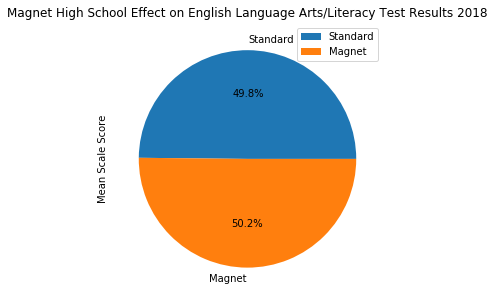

In [23]:
high_magnet_l = dflhigh.groupby('Magnet', as_index=False)["Mean Scale Score"].mean()
labels = ["Magnet", "Standard"]
high_magnet_l.plot(kind="pie", y="Mean Scale Score", labels=["Standard", "Magnet"], title="Magnet High School Effect on English Language Arts/Literacy Test Results 2018", figsize=(5, 5), autopct='%1.1f%%')

In [24]:
# Magnet High school effect on Math Test Results

dfm = df2018.loc[(df2018["Test Id"] == 2)]
dfmhigh = dfm[(dfm["Grade"] == 7) | (dfm["Grade"] == 8) | (dfm["Grade"] == 11)]


MagnetGroups_df = dfmhigh.groupby('Magnet', as_index=False)[[ 'Mean Scale Score', 'Percentage Standard Met','Percentage Standard Exceeded',
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
MagnetGroups_df

,Magnet,Mean Scale Score,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Nearly Met,Percentage Standard Not Met
0,N,2539.377285,18.634604,16.344410,25.414472,39.606307
1,Y,2567.993636,20.217523,24.439273,22.407068,32.936091


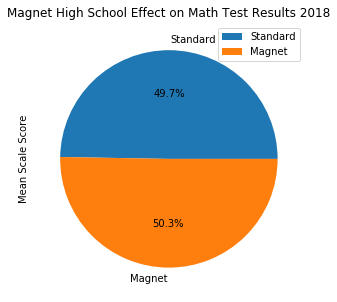

In [25]:
high_magnet_m = dfmhigh.groupby('Magnet', as_index=False)["Mean Scale Score"].mean()
labels = ["Magnet", "Standard"]
high_magnet_m.plot(kind="pie", y="Mean Scale Score", labels=["Standard", "Magnet"], title="Magnet High School Effect on Math Test Results 2018", figsize=(5, 5), autopct='%1.1f%%')



In [26]:
# A mean scale score is the average performance of a group of students on an assessment. 
# Specifically, a mean scale score is calculated by adding all individual student scores and dividing by the number of total scores.

### High School Numbers in 2019

In [153]:
pubschls = pd.read_csv("pubschls.csv", na_values="*", low_memory=False)

In [154]:
pubschls = pubschls[["CDSCode", "County", "District", "School", "EILCode", "EILName", "OpenDate",
                                 "Charter","Magnet", "YearRoundYN", "FundingType"]]

In [155]:
pubschls.tail()

,CDSCode,County,District,School,EILCode,EILName,OpenDate,Charter,Magnet,YearRoundYN,FundingType
18100,58727695830039,Yuba,Wheatland Union High,Wheatland Continuation,UG,Ungraded,7/1/1980,N,No Data,N,No Data
18101,58727695830070,Yuba,Wheatland Union High,Wheatland Alternative Education,HS,High School,7/1/1980,N,No Data,N,No Data
18102,58727695830120,Yuba,Wheatland Union High,Academy for Career Education Charter,HS,High School,8/23/1999,Y,No Data,N,Locally funded
18103,58727695838305,Yuba,Wheatland Union High,Wheatland Union High,HS,High School,7/1/1980,N,N,N,No Data
18104,Total Records =,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
pubschls = pubschls.dropna()

In [158]:
pubschls["CDSCode"] = pubschls["CDSCode"].astype(str).astype(float)

In [160]:
results19["CDSCode"] = results19["CDSCode"].astype(str).astype(float)

In [161]:
df2019 = pubschls.merge(results19, on="CDSCode", how="inner")
df2019 = df2019.dropna()
df2019.head()

,CDSCode,County,District,School,EILCode,EILName,OpenDate,Charter,Magnet,YearRoundYN,FundingType,Test Id,Grade,Students Tested,Mean Scale Score,Subgroup ID,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met
0,1.100176e+12,Alameda,Alameda County Office of Education,Cox Academy,ELEM,Elementary,7/1/1980,Y,N,N,Directly funded,1,3,99.0,2357.8,1,9.09,9.09,21.21,60.61
1,1.100176e+12,Alameda,Alameda County Office of Education,Cox Academy,ELEM,Elementary,7/1/1980,Y,N,N,Directly funded,1,3,55.0,2349.7,3,7.27,9.09,20.00,63.64
2,1.100176e+12,Alameda,Alameda County Office of Education,Cox Academy,ELEM,Elementary,7/1/1980,Y,N,N,Directly funded,1,3,44.0,2367.9,4,11.36,9.09,22.73,56.82
3,1.100176e+12,Alameda,Alameda County Office of Education,Cox Academy,ELEM,Elementary,7/1/1980,Y,N,N,Directly funded,1,3,60.0,2390.3,6,15.00,15.00,26.67,43.33
4,1.100176e+12,Alameda,Alameda County Office of Education,Cox Academy,ELEM,Elementary,7/1/1980,Y,N,N,Directly funded,1,3,28.0,2417.9,8,25.00,10.71,32.14,32.14


In [162]:
df2019["EILCode"].unique()

array(['ELEM', 'INTMIDJR', 'ELEMHIGH', 'HS'], dtype=object)

In [163]:
#high19 = df2019.loc[(df2019["Grade"] == 7) | (df2019["Grade"] == 8) | (df2019["Grade"] == 11)]

In [164]:
high19 = df2019.loc[(df2019["EILCode"] == "HS")  | (df2019["EILCode"] == "ELEMHIGH") | (df2019["EILCode"] == "INTMIDJR")]

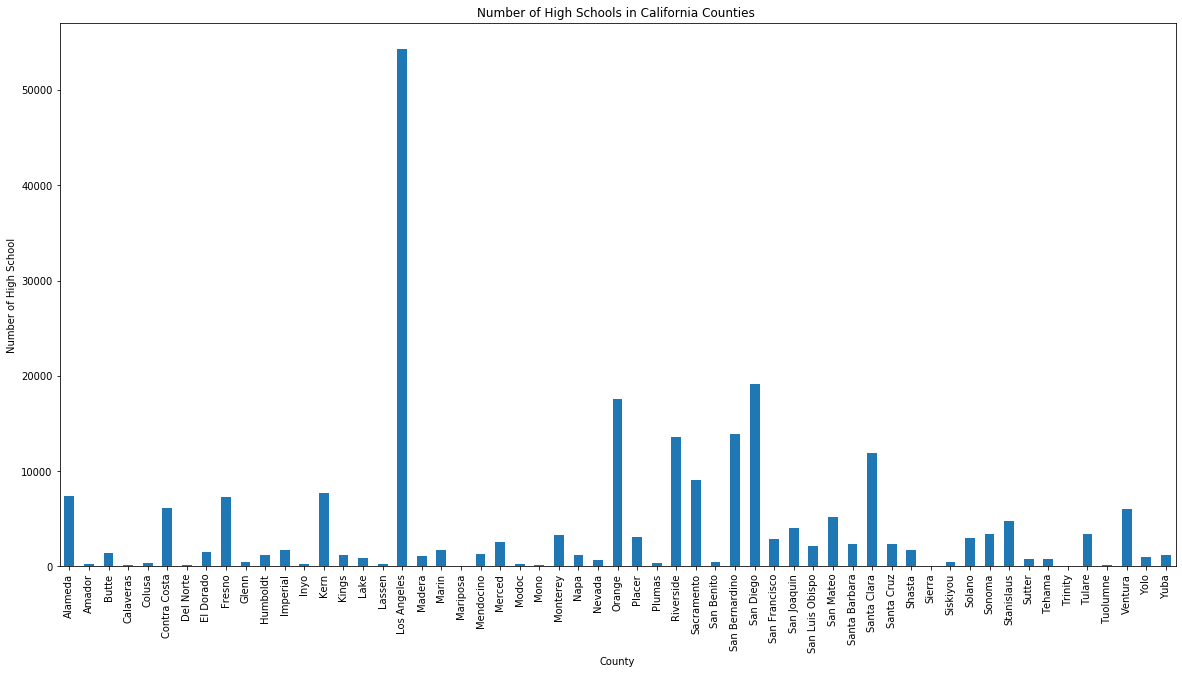

In [165]:
school_number = high19.groupby(["County"])["School"].count()
ax = school_number.plot(kind="bar", figsize=(20, 10) )
ax.set_title("Number of High Schools in California Counties ")
ax.set_xlabel("County")
ax.set_ylabel("Number of High School")
ax.figure.savefig("CaliforniaHighSchoolNumber.png")




In [166]:
pl_high19 = high19.loc[high19["County"] == "Placer" ]

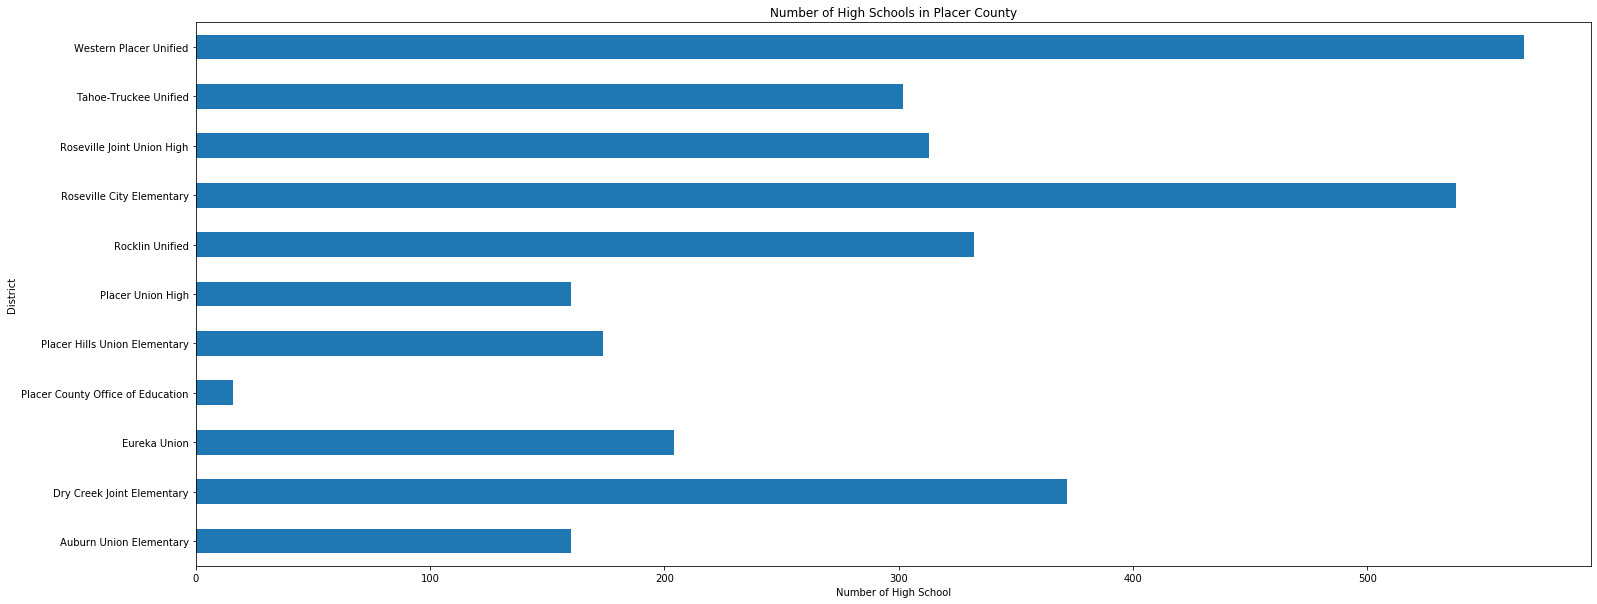

In [167]:
school_number = pl_high19.groupby(["District"])["School"].count()
ax = school_number.plot(kind="barh", figsize=(25, 10) )
ax.set_title("Number of High Schools in Placer County")
ax.set_ylabel("District")
ax.set_xlabel("Number of High School")
ax.figure.savefig("PlacerHighSchoolNumber.png")


# Merge and Average Scores of Last for Years 2016 - 2019

In [168]:
df2019["Mean Scale Score 16"] = results17["Mean Scale Score"]

In [169]:
df2019["Mean Scale Score 17"] = results18["Mean Scale Score"]

In [170]:
df2019["Mean Scale Score 18"] = results19["Mean Scale Score"]

In [171]:
df2019["Ave Score of Last Four Years"]=(df2019["Mean Scale Score"]+df2019["Mean Scale Score 16"]+
                                        df2019["Mean Scale Score 17"]+df2019["Mean Scale Score 18"])/4

In [172]:
df2019.columns

Index(['CDSCode', 'County', 'District', 'School', 'EILCode', 'EILName',
       'OpenDate', 'Charter', 'Magnet', 'YearRoundYN', 'FundingType',
       'Test Id', 'Grade', 'Students Tested', 'Mean Scale Score',
       'Subgroup ID', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Mean Scale Score 16',
       'Mean Scale Score 17', 'Mean Scale Score 18',
       'Ave Score of Last Four Years'],
      dtype='object')

In [173]:
df2019 = df2019.dropna()

## Magnet School Effects of High Schools and Elementary Level

In [174]:
dfhigh = df2019.loc[(df2019["Grade"] == 7) | (df2019["Grade"] == 8) | (df2019["Grade"] == 11)]

Text(98.5, 0.5, 'Language Arts/Literacy(1) and Math(2) Test Scores Average')

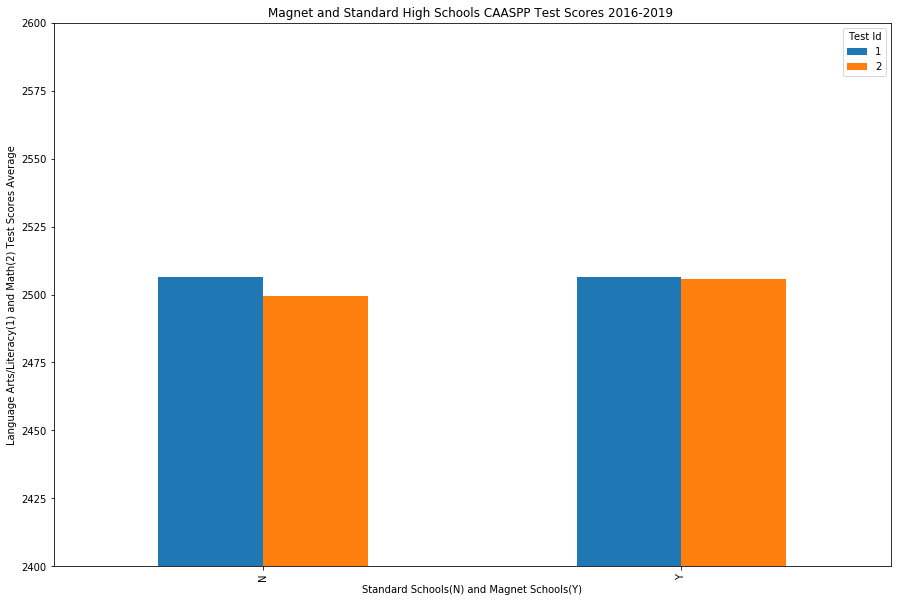

In [175]:
ax = dfhigh.groupby(['Magnet','Test Id'])['Ave Score of Last Four Years'].mean().unstack('Test Id').plot(kind="bar", figsize=(15,10))
ax.set_ylim(2400,2600)
plt.title("Magnet and Standard High Schools CAASPP Test Scores 2016-2019 ")
plt.savefig("MagnetHighSchoolPerformance1.png")
plt.xlabel("Standard Schools(N) and Magnet Schools(Y)")
plt.ylabel("Language Arts/Literacy(1) and Math(2) Test Scores Average")

In [176]:
dfelem = df2019.loc[((df2019["Grade"] == 3) | (df2019["Grade"] == 4) | (df2019["Grade"] == 5) | (df2019["Grade"] == 6) | 
                     (df2019["Grade"] == 7) | (df2019["Grade"] == 8))]

In [177]:
dfelem = dfelem.dropna()

Text(98.5, 0.5, 'Language Arts/Literacy(1) and Math(2) Test Scores Average')

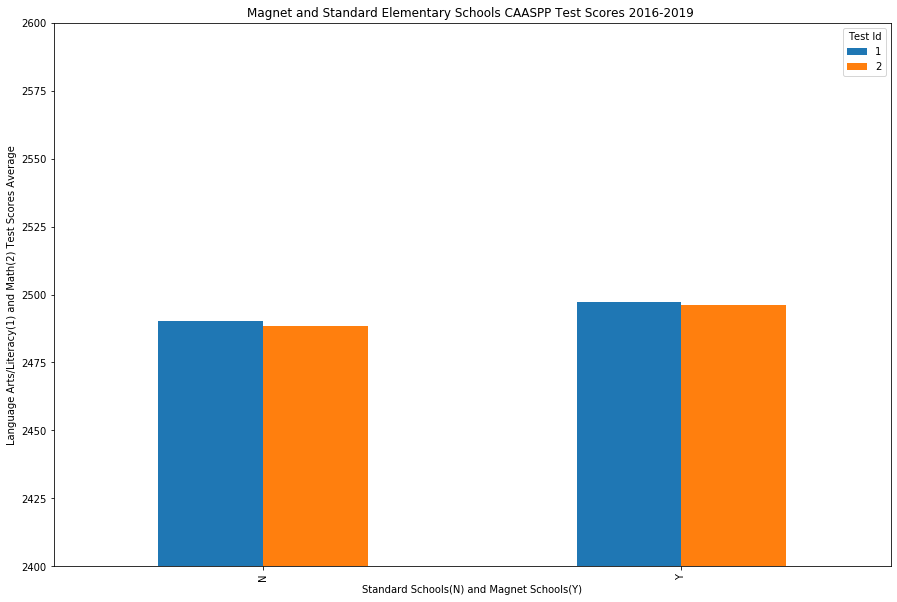

In [178]:
ax = dfelem.groupby(['Magnet','Test Id'])['Ave Score of Last Four Years'].mean().unstack('Test Id').plot(kind="bar", figsize=(15,10))
ax.set_ylim(2400,2600)
plt.title("Magnet and Standard Elementary Schools CAASPP Test Scores 2016-2019 ")
plt.savefig("MagnetElementarySchoolPerformance1.png")
plt.xlabel("Standard Schools(N) and Magnet Schools(Y)")
plt.ylabel("Language Arts/Literacy(1) and Math(2) Test Scores Average")

## Placer County High Schools Test Score Averages

In [200]:
plahigh19 = df2019.loc[(df2019["EILCode"] == "HS")]

In [ ]:
dfhigh_pla = plahigh19.loc[dfhigh["County"] == "Placer"]

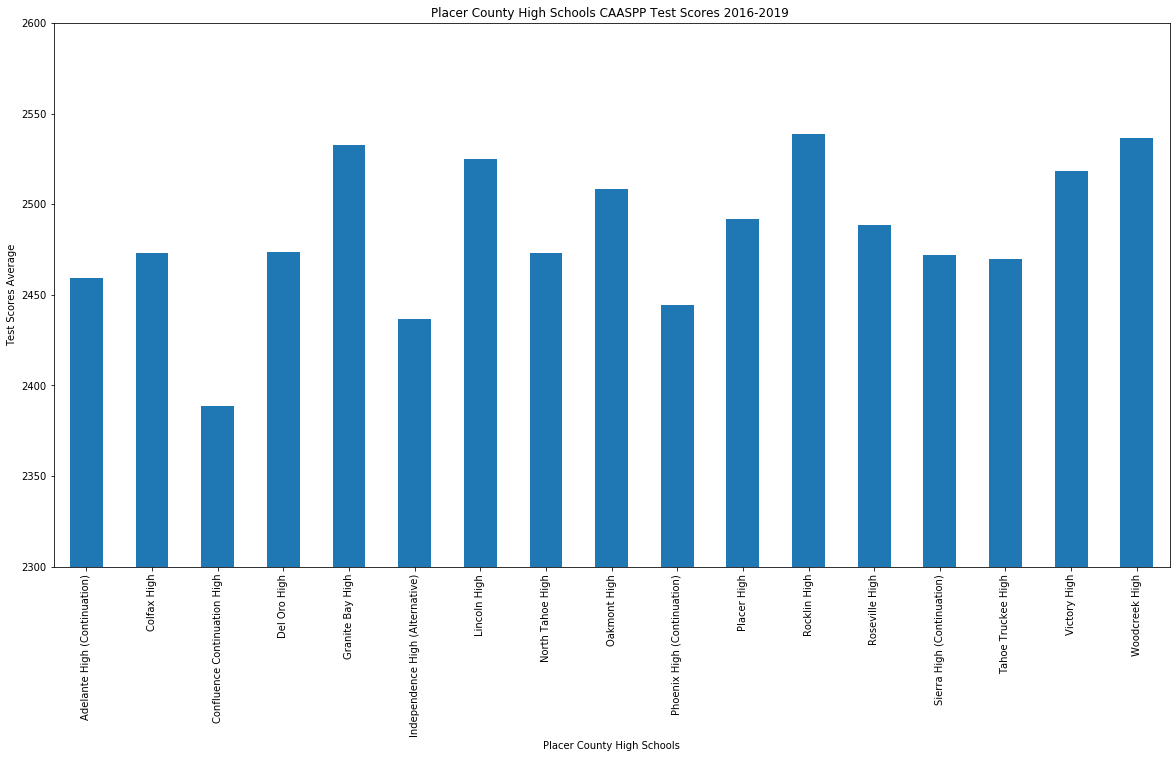

In [199]:
ax = dfhigh_pla.groupby("School")["Ave Score of Last Four Years"].mean().plot(kind="bar", figsize=(20,10))
ax.set_ylim(2300,2600)
ax.set_title("Placer County High Schools CAASPP Test Scores 2016-2019 ")
ax.set_xlabel("Placer County High Schools")
ax.set_ylabel("Test Scores Average")
ax.figure.savefig("PlacerHighSchoolSuccess.png")

## Achievement Levels

In [304]:
pla_hs_successlevels = dfhigh_pla.groupby(["School"])[["School","Percentage Standard Exceeded",
       "Percentage Standard Met","Percentage Standard Nearly Met",
       "Percentage Standard Not Met"]].mean()

In [305]:
pla_hs_successlevels.head()

,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met
School,,,,
Adelante High (Continuation),0.000000,0.697143,5.982857,93.320000
Colfax High,13.055000,18.825000,39.575000,28.545000
Confluence Continuation High,0.000000,0.000000,4.165000,95.835000
Del Oro High,13.640000,28.177143,33.462857,24.721429
Granite Bay High,49.121667,32.263333,13.996667,4.615000


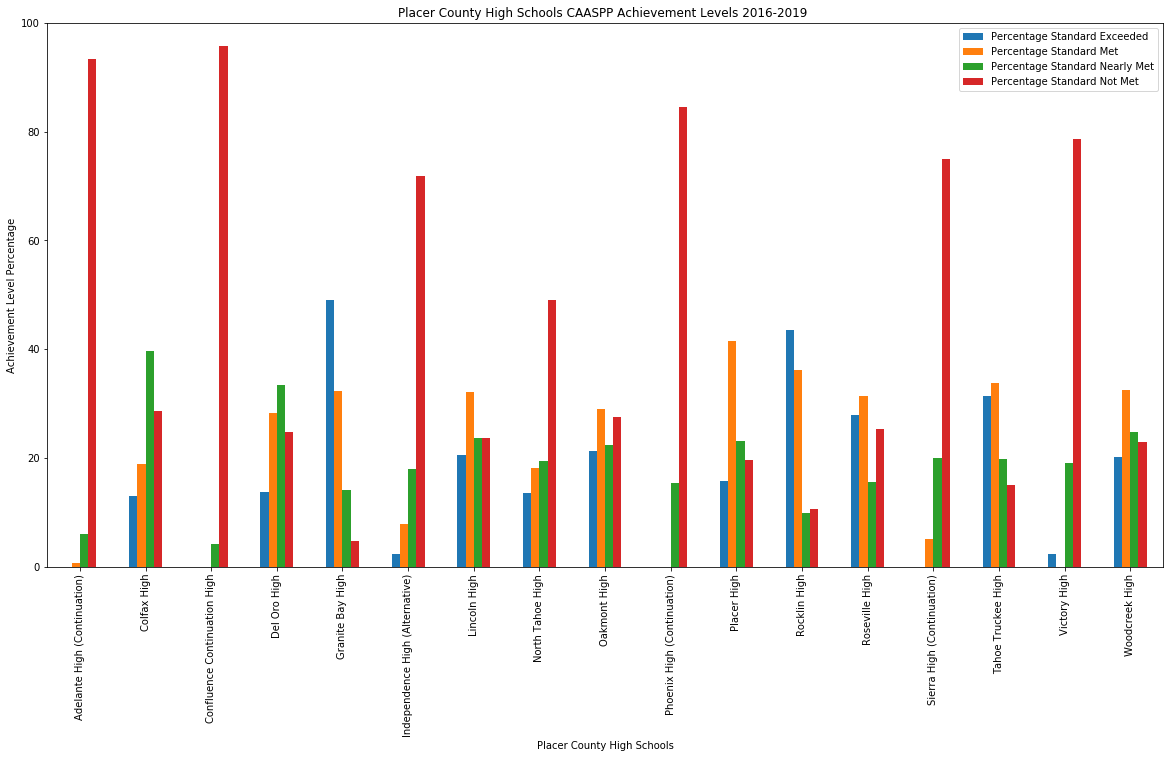

In [307]:
ax = pla_hs_successlevels.plot(kind="bar", figsize=(20,10))
ax.set_ylim(0,100)
ax.set_title("Placer County High Schools CAASPP Achievement Levels 2016-2019 ")
ax.set_xlabel("Placer County High Schools")
ax.set_ylabel("Achievement Level Percentage")
ax.figure.savefig("PlacerHighSchoolSuccessLevels.png")



## Funding Type 

In [192]:
pl_high19 = dfhigh.loc[dfhigh["FundingType"] != "No Data"]

Text(98.5, 0.5, 'Language Arts/Literacy(1) and Math(2) Test Scores Average')

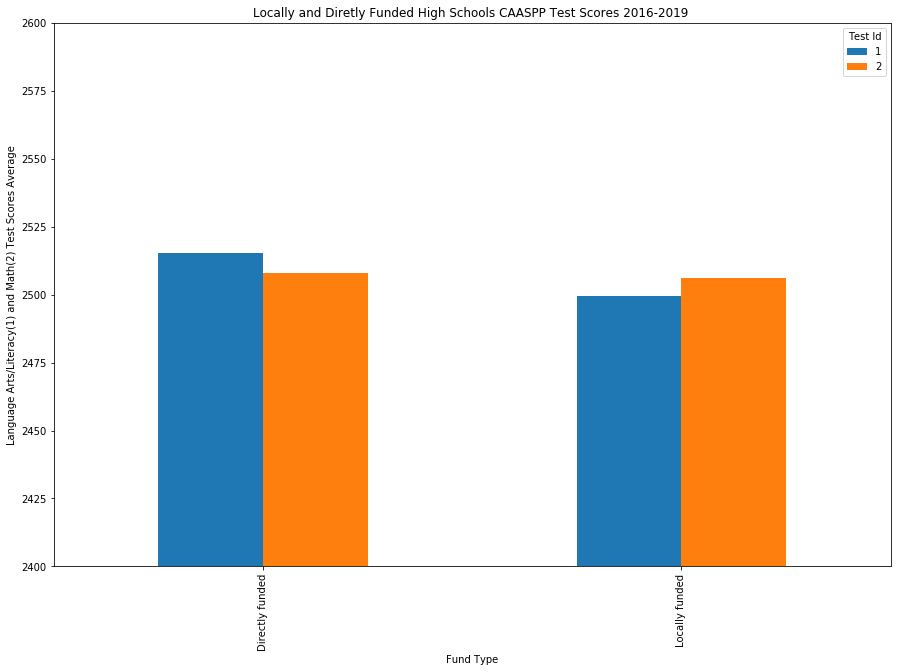

In [193]:
ax = pl_high19.groupby(['FundingType','Test Id'])['Ave Score of Last Four Years'].mean().unstack('Test Id').plot(kind="bar", figsize=(15,10))
ax.set_ylim(2400,2600)
plt.title("Locally and Diretly Funded High Schools CAASPP Test Scores 2016-2019 ")
plt.savefig("LocallyandDiretlyFundedHighSchools.png")
plt.xlabel("Fund Type")
plt.ylabel("Language Arts/Literacy(1) and Math(2) Test Scores Average")

## Year Round Education Program 

In [205]:
dfhigh = dfhigh.loc[dfhigh["YearRoundYN"] != "No Data"]

Text(98.5, 0.5, 'Language Arts/Literacy(1) and Math(2) Test Scores Average')

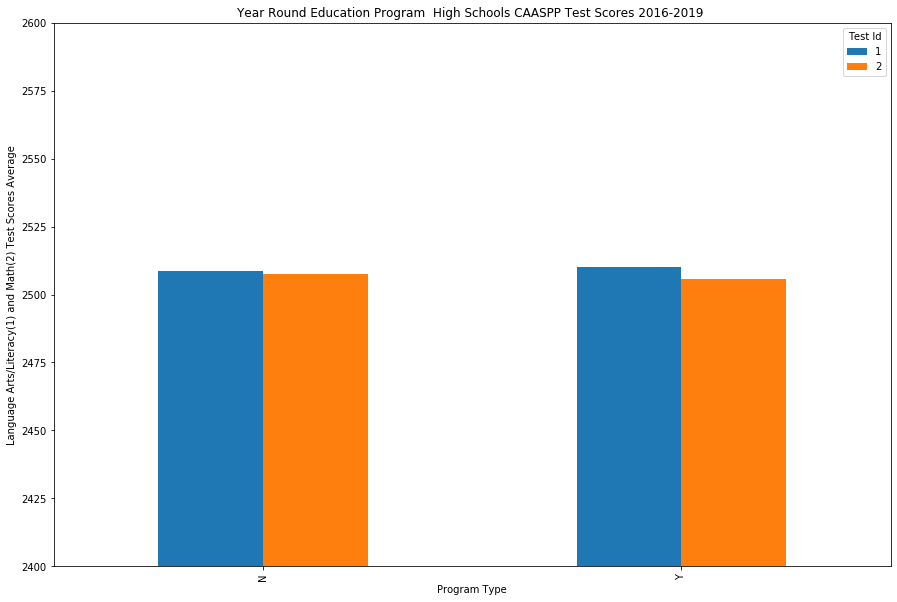

In [206]:
ax = dfhigh.groupby(['YearRoundYN','Test Id'])['Ave Score of Last Four Years'].mean().unstack('Test Id').plot(kind="bar", figsize=(15,10))
ax.set_ylim(2400,2600)
plt.title("Year Round Education Program  High Schools CAASPP Test Scores 2016-2019 ")
plt.savefig("YNHighSchools.png")
plt.xlabel("Program Type")
plt.ylabel("Language Arts/Literacy(1) and Math(2) Test Scores Average")

## Charter High Schools

In [207]:
dfhigh["Charter"].unique()

array(['Y'], dtype=object)